# Cris Working Notebook
___

# 1.10 Friday - Data Mapping

In [93]:
import pandas as pd

In [ ]:
train = pd.read_csv("train.csv")
labels = pd.read_csv("train_labels.csv")
specs = pd.read_csv("specs.csv")

In [ ]:
print(f"dataset: {len(train)}")
print(f"event_id: {len(train.event_id)}")
print(f"game_session: {len(train.game_session)}")
print(" ")
print(f"unique event_codes: {len(train.event_code.unique())}")
print(f"unique title: {len(train.title.unique())}")

In [ ]:
train.head()

In [ ]:
train[train.world == "MAGMAPEAK"].groupby(["type","title"])["world"].count()

In [ ]:
magma = train[train.world == "MAGMAPEAK"]

In [ ]:
print(f"{train.type.value_counts()}")
print(len(train.event_id))

In [ ]:
len(train.event_id.unique())

In [ ]:
len(train.title.unique())

In [ ]:
len(train.event_code.unique())

In [ ]:
train.event_code.value_counts()

In [ ]:
bdf = pd.merge(train,specs,on="event_id")

In [ ]:
df = bdf[["event_code","event_id","info"]].sample(100_000)

In [ ]:
df[df.event_code==4035]

In [ ]:
labels.head()

---

# 1.13 Monday - Hypothesis Testing

## Summary of Insights:
1. There's a Very Weak Negative Correlation between the no. of assessments taken by a user, and their average accuracy.
 - This tells me that the accuracy is not about the amount of times assessments are taken.
 - There are distinct low, average, high performers - why?

In [161]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
# big = pd.read_csv("big.csv")

In [18]:
big.head()

,Unnamed: 0,event_id,session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group
0,2185,3bfd1a65,901acc108f55a5a1,2019-08-06T05:22:01.344Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0
1,2186,db02c830,901acc108f55a5a1,2019-08-06T05:22:01.400Z,"{""event_count"":2,""game_time"":37,""event_code"":2...",0006a69f,2,2025,37,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0
2,2187,a1e4395d,901acc108f55a5a1,2019-08-06T05:22:01.403Z,"{""description"":""Pull three mushrooms out of th...",0006a69f,3,3010,37,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0
3,2188,a52b92d5,901acc108f55a5a1,2019-08-06T05:22:05.242Z,"{""description"":""Pull three mushrooms out of th...",0006a69f,4,3110,3901,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0
4,2189,a1e4395d,901acc108f55a5a1,2019-08-06T05:22:05.244Z,"{""description"":""To pick a mushroom, pull it ou...",0006a69f,5,3010,3901,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0


## Are the of Assessment Taken and Average Accuracy Correlated to Each Other?

### Look at data

In [19]:
print("Accuracy Measures:")
sorted(big.accuracy.unique())

Accuracy Measures:


[0.0,
 0.024390243902439025,
 0.025,
 0.03448275862068965,
 0.037037037037037035,
 0.04,
 0.041666666666666664,
 0.043478260869565216,
 0.045454545454545456,
 0.047619047619047616,
 0.05,
 0.05263157894736842,
 0.05555555555555555,
 0.05882352941176471,
 0.0625,
 0.06666666666666668,
 0.07142857142857142,
 0.07692307692307693,
 0.08333333333333333,
 0.09090909090909093,
 0.1,
 0.1111111111111111,
 0.125,
 0.14285714285714285,
 0.16666666666666666,
 0.2,
 0.25,
 0.3333333333333333,
 0.5,
 1.0]

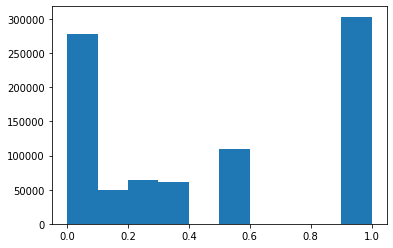

In [28]:
plt.hist(x="accuracy",data=big)
plt.show()

In [32]:
print(f"no. of unique installation ids: {len(big.installation_id.unique())}")

no. of unique installation ids: 3614


### Trim data for analysis

In [84]:
assessment = big.groupby("installation_id")["accuracy"].agg(["count","mean"])

In [85]:
assessment.head()

,count,mean
installation_id,,
0006a69f,244,0.557377
0006c192,340,0.364706
00129856,40,1.000000
001d0ed0,194,0.422680
00225f67,37,0.000000


In [86]:
assessment.columns

Index(['count', 'mean'], dtype='object')

In [87]:
assessment.columns = ["no_assessment","ave_accuracy"]
assessment.head()

,no_assessment,ave_accuracy
installation_id,,
0006a69f,244,0.557377
0006c192,340,0.364706
00129856,40,1.000000
001d0ed0,194,0.422680
00225f67,37,0.000000


In [88]:
assessment.describe()

,no_assessment,ave_accuracy
count,3614.000000,3614.000000
mean,239.470670,0.532262
std,347.777106,0.338086
min,6.000000,0.000000
25%,65.000000,0.267870
50%,139.000000,0.503437
75%,280.000000,0.837821
max,7395.000000,1.000000


Text(0, 0.5, 'Ave Accuracy')

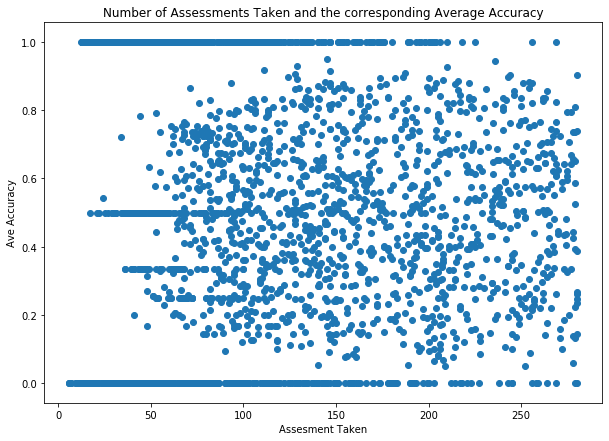

In [89]:
plt.figure(figsize=(10,7))
plt.scatter(x="no_assessment",y="ave_accuracy",data=assessment[assessment.no_assessment <= 280])

plt.title("Number of Assessments Taken and the corresponding Average Accuracy")
plt.xlabel("Assesment Taken")
plt.ylabel("Ave Accuracy")

It seems like there are distinct low, average, high performers, that the amount of assessments they take does not matter. From the visualization, it does not seem like there is a correlation between the total no. of assessments taken, and the average accuracy. Nevertheless, let's do some statistical test to prove this.

### Plan:
1. Take 10 random samples and get the pearson's r for the two variables, `no_assessment` and `ave_accuracy`.
    - Get 1084 observations per sample, which is 30% of the population (3614)
2. Get the mean of the pearson's r of these 5 random samples to see the strength of correlation.

In [119]:
s1 = assessment.sample(frac=.20)
s2 = assessment.sample(frac=.30)
s3 = assessment.sample(frac=.40)
s4 = assessment.sample(frac=.50)
s5 = assessment.sample(frac=.60)

Check that these samples are random.

In [120]:
s1.head()

,no_assessment,ave_accuracy
installation_id,,
894c6dce,202,0.196782
54413e4a,70,1.000000
444deed0,259,0.000000
2836f356,102,0.562092
e6828a70,590,0.925424


In [121]:
s2.head()

,no_assessment,ave_accuracy
installation_id,,
12887b75,29,0.00000
37892700,68,1.00000
f605e2d5,933,0.37960
11bbb62a,398,0.83459
15785cc9,49,0.50000


In [122]:
print(f"shape of sample 3: {s3.shape}")
print(f"shape of sample 4: {s4.shape}")
print(f"shape of sample 5: {s5.shape}")

shape of sample 3: (1446, 2)
shape of sample 4: (1807, 2)
shape of sample 5: (2168, 2)


In [123]:
r1, pval1 = stats.pearsonr(s1.no_assessment, s1.ave_accuracy)
r2, pval2 = stats.pearsonr(s2.no_assessment, s2.ave_accuracy)
r3, pval3 = stats.pearsonr(s3.no_assessment, s3.ave_accuracy)
r4, pval4 = stats.pearsonr(s4.no_assessment, s4.ave_accuracy)
r5, pval5 = stats.pearsonr(s5.no_assessment, s5.ave_accuracy)

In [125]:
samples = [s1,s2,s3,s4,s5]
sample_size = [len(sample) for sample in samples]

In [126]:
pearsons_r = [r1,r2,r3,r4,r5]
pvalue = [pval1,pval2, pval3, pval4, pval5]

In [132]:
metric_table = pd.DataFrame({"sample":["s1","s2","s3","s4","s5"],"pearsons_r":pearsons_r,"pvalue":pvalue,"sample_size":sample_size})

In [133]:
metric_table.head()

,sample,pearsons_r,pvalue,sample_size
0,s1,-0.127724,5.763710e-04,723
1,s2,-0.145596,1.481167e-06,1084
2,s3,-0.157867,1.581835e-09,1446
3,s4,-0.127234,5.733756e-08,1807
4,s5,-0.132612,5.700583e-10,2168


In [139]:
print(f"Average Pearsons R: {metric_table.pearsons_r.mean()}")
print("Very Weak Negative Relationship")

Average Pearsons R: -0.13820670929071588
Very Weak Negative Relationship


## What's the relationship between the type of activity engage in and their accuracy score? Are the users who did all three activities (game, activity, clip) in combination have higher accuracy scores?

In [189]:
import wrangle

In [190]:
test_takers = wrangle.get_assessment_users()

FileNotFoundError: [Errno 2] File b'./data/assessment_users.csv' does not exist: b'./data/assessment_users.csv'

In [146]:
bigger.head()

,Unnamed: 0,event_id,session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group
0,0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,NaN,NaN,NaN,NaN
1,1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,NaN,NaN,NaN,NaN
2,2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN
3,3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN
4,4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN


In [186]:
activity = bigger[["installation_id","type","accuracy"]]
activity.head()

,installation_id,type,accuracy
0,0001e90f,Clip,NaN
1,0001e90f,Clip,NaN
2,0001e90f,Activity,NaN
3,0001e90f,Activity,NaN
4,0001e90f,Activity,NaN


In [187]:
activity["c"] = np.where(activity.type=="Clip", 1, 0)
activity["a"] = np.where(activity.type=="Activity", 1, 0)
activity["g"] = np.where(activity.type=="Game", 1, 0)

In [ ]:
def cg_agg(df,c,a):
    if

In [ ]:
act_agg = activity.groupby("installation_id").agg(sum)

In [188]:
activity.sample(20)

,installation_id,type,accuracy,c,a,g
5323664,75fa6f4d,Game,NaN,0,0,1
6890392,9a31bcac,Assessment,0.0,0,0,0
10730203,f1c21eda,Assessment,0.0,0,0,0
5143471,72feea62,Activity,NaN,0,1,0
4214279,5cf6b5f7,Activity,NaN,0,1,0
862204,1390933c,Game,NaN,0,0,1
4935123,6e51f9a2,Game,NaN,0,0,1
6762821,96d959d5,Game,NaN,0,0,1
3509618,4d7d3d97,Activity,NaN,0,1,0
2133335,2ffb27f9,Game,NaN,0,0,1


In [183]:
activity[activity.cag==1]

,installation_id,type,accuracy,c,a,g,cg,ca,ag,cag


In [ ]:
get_assessment_users(cache=True):